In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import random as rm
import time as tm
import matplotlib.pyplot as plt
from scipy import stats
from pandas.api.types import is_string_dtype 
from pandas.api.types import is_numeric_dtype 
import sklearn.metrics as skm
import sklearn.impute as ski
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import math
import scipy.stats as stats
import statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df1 = pd.read_csv('feat_eng_df.csv')
##df1 = pd.read_csv('merged_df_ashvFMT.csv')
df1

,STATE,PROVINCE_STATE_NAME,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,Series_Complete_5Plus,...,new_deaths_50_min,new_deaths_100_min,vaccination_rate_1dose,vaccination_rate_complete,booster_rate,prop_age04,prop_age59,prop_age6064,prop_age8084,prop_age85plus
0,1,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.000000,0.000000,0.000000,5.810037,5.990525,6.557529,2.031935,1.845802
1,1,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.000000,0.000000,0.000000,5.810037,5.990525,6.557529,2.031935,1.845802
2,1,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.000000,0.000000,0.000000,5.810037,5.990525,6.557529,2.031935,1.845802
3,1,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.000000,0.000000,0.000000,5.810037,5.990525,6.557529,2.031935,1.845802
4,1,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.000000,0.000000,0.000000,5.810037,5.990525,6.557529,2.031935,1.845802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41495,56,Wyoming,2233.3,329321.0,329281.0,320164.0,301436.0,89872.0,289310.0,289303.0,...,0.0,0.0,0.566446,0.497625,0.213973,5.390613,6.173920,6.798296,1.940552,1.789704
41496,56,Wyoming,2233.3,329436.0,329396.0,320270.0,301530.0,89903.0,289419.0,289412.0,...,0.0,0.0,0.566644,0.497813,0.214267,5.390613,6.173920,6.798296,1.940552,1.789704
41497,56,Wyoming,2233.3,329503.0,329463.0,320324.0,301580.0,89919.0,289492.0,289485.0,...,0.0,0.0,0.566759,0.497939,0.214424,5.390613,6.173920,6.798296,1.940552,1.789704
41498,56,Wyoming,2233.3,329578.0,329538.0,320393.0,301639.0,89944.0,289582.0,289575.0,...,0.0,0.0,0.566888,0.498093,0.214666,5.390613,6.173920,6.798296,1.940552,1.789704


In [4]:
print(df1.columns.tolist())

['STATE', 'PROVINCE_STATE_NAME', 'Completeness_pct', 'Administered_Dose1_Recip', 'Administered_Dose1_Recip_5Plus', 'Administered_Dose1_Recip_12Plus', 'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_65Plus', 'Series_Complete_Yes', 'Series_Complete_5Plus', 'Series_Complete_5to17', 'Series_Complete_12Plus', 'Series_Complete_18Plus', 'Series_Complete_65Plus', 'Booster_Doses', 'Booster_Doses_5Plus', 'Booster_Doses_12Plus', 'Booster_Doses_18Plus', 'Booster_Doses_50Plus', 'Booster_Doses_65Plus', 'Second_Booster_50Plus', 'Second_Booster_65Plus', 'Bivalent_Booster_5Plus', 'Bivalent_Booster_12Plus', 'Bivalent_Booster_18Plus', 'Bivalent_Booster_65Plus', 'PEOPLE_POSITIVE_CASES_COUNT', 'PEOPLE_DEATH_NEW_COUNT', 'PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PEOPLE_DEATH_COUNT', 'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE', 'BAC_MALE', '

In [5]:
non_numeric_columns = df1.select_dtypes(exclude='number').columns

# Display the non-numeric columns
print("Non-Numeric Columns:")
print(non_numeric_columns)

Non-Numeric Columns:
Index(['PROVINCE_STATE_NAME'], dtype='object')


In [6]:
# Sort DataFrame by 'Date' in descending order
df1_sorted = df1.sort_index(ascending=True)

# Delete the 250 oldest dates
df1_filtered = df1_sorted.iloc[350:]

# Display the resulting DataFrame
df1_filtered

,STATE,PROVINCE_STATE_NAME,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,Series_Complete_5Plus,...,new_deaths_50_min,new_deaths_100_min,vaccination_rate_1dose,vaccination_rate_complete,booster_rate,prop_age04,prop_age59,prop_age6064,prop_age8084,prop_age85plus
350,1,Alabama,0.0,0.0,1349267.0,0.0,0.0,0.0,0.0,1107224.0,...,0.0,-1.0,0.000000,0.000000,0.056251,5.747482,6.005589,6.572933,2.041508,1.836591
351,1,Alabama,0.0,0.0,1349218.0,0.0,0.0,0.0,0.0,1107181.0,...,0.0,0.0,0.000000,0.000000,0.056223,5.747482,6.005589,6.572933,2.041508,1.836591
352,1,Alabama,859.5,23162.0,1349267.0,23162.0,23159.0,2857.0,1244.0,1107224.0,...,0.0,0.0,0.004587,0.000246,0.056251,5.747482,6.005589,6.572933,2.041508,1.836591
353,1,Alabama,860.4,23369.0,1349267.0,23369.0,23366.0,2958.0,1375.0,1107224.0,...,0.0,0.0,0.004628,0.000272,0.056251,5.747482,6.005589,6.572933,2.041508,1.836591
354,1,Alabama,1518.4,42440.0,1349267.0,42430.0,42423.0,5687.0,5341.0,1107224.0,...,0.0,0.0,0.008404,0.001058,0.056251,5.747482,6.005589,6.572933,2.041508,1.836591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41495,56,Wyoming,2233.3,329321.0,329281.0,320164.0,301436.0,89872.0,289310.0,289303.0,...,0.0,0.0,0.566446,0.497625,0.213973,5.390613,6.173920,6.798296,1.940552,1.789704
41496,56,Wyoming,2233.3,329436.0,329396.0,320270.0,301530.0,89903.0,289419.0,289412.0,...,0.0,0.0,0.566644,0.497813,0.214267,5.390613,6.173920,6.798296,1.940552,1.789704
41497,56,Wyoming,2233.3,329503.0,329463.0,320324.0,301580.0,89919.0,289492.0,289485.0,...,0.0,0.0,0.566759,0.497939,0.214424,5.390613,6.173920,6.798296,1.940552,1.789704
41498,56,Wyoming,2233.3,329578.0,329538.0,320393.0,301639.0,89944.0,289582.0,289575.0,...,0.0,0.0,0.566888,0.498093,0.214666,5.390613,6.173920,6.798296,1.940552,1.789704


In [7]:
df1_filtered

,STATE,PROVINCE_STATE_NAME,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,Series_Complete_5Plus,...,new_deaths_50_min,new_deaths_100_min,vaccination_rate_1dose,vaccination_rate_complete,booster_rate,prop_age04,prop_age59,prop_age6064,prop_age8084,prop_age85plus
350,1,Alabama,0.0,0.0,1349267.0,0.0,0.0,0.0,0.0,1107224.0,...,0.0,-1.0,0.000000,0.000000,0.056251,5.747482,6.005589,6.572933,2.041508,1.836591
351,1,Alabama,0.0,0.0,1349218.0,0.0,0.0,0.0,0.0,1107181.0,...,0.0,0.0,0.000000,0.000000,0.056223,5.747482,6.005589,6.572933,2.041508,1.836591
352,1,Alabama,859.5,23162.0,1349267.0,23162.0,23159.0,2857.0,1244.0,1107224.0,...,0.0,0.0,0.004587,0.000246,0.056251,5.747482,6.005589,6.572933,2.041508,1.836591
353,1,Alabama,860.4,23369.0,1349267.0,23369.0,23366.0,2958.0,1375.0,1107224.0,...,0.0,0.0,0.004628,0.000272,0.056251,5.747482,6.005589,6.572933,2.041508,1.836591
354,1,Alabama,1518.4,42440.0,1349267.0,42430.0,42423.0,5687.0,5341.0,1107224.0,...,0.0,0.0,0.008404,0.001058,0.056251,5.747482,6.005589,6.572933,2.041508,1.836591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41495,56,Wyoming,2233.3,329321.0,329281.0,320164.0,301436.0,89872.0,289310.0,289303.0,...,0.0,0.0,0.566446,0.497625,0.213973,5.390613,6.173920,6.798296,1.940552,1.789704
41496,56,Wyoming,2233.3,329436.0,329396.0,320270.0,301530.0,89903.0,289419.0,289412.0,...,0.0,0.0,0.566644,0.497813,0.214267,5.390613,6.173920,6.798296,1.940552,1.789704
41497,56,Wyoming,2233.3,329503.0,329463.0,320324.0,301580.0,89919.0,289492.0,289485.0,...,0.0,0.0,0.566759,0.497939,0.214424,5.390613,6.173920,6.798296,1.940552,1.789704
41498,56,Wyoming,2233.3,329578.0,329538.0,320393.0,301639.0,89944.0,289582.0,289575.0,...,0.0,0.0,0.566888,0.498093,0.214666,5.390613,6.173920,6.798296,1.940552,1.789704


In [8]:
missing_values_count = df1_filtered.isna().sum()
# Display the count of missing values for each column

# Filter columns with missing values greater than 0
columns_with_missing_values = missing_values_count[missing_values_count > 0]

# Print or display the result
print("Columns with Missing Values:")
print(columns_with_missing_values)

Columns with Missing Values:
Series([], dtype: int64)


In [9]:
df1_filtered = df1_filtered.loc[df1_filtered['PROVINCE_STATE_NAME'].isin(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan'])]
df1_filtered

,STATE,PROVINCE_STATE_NAME,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,Series_Complete_5Plus,...,new_deaths_50_min,new_deaths_100_min,vaccination_rate_1dose,vaccination_rate_complete,booster_rate,prop_age04,prop_age59,prop_age6064,prop_age8084,prop_age85plus
3320,6,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398
3321,6,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398
3322,6,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398
3323,6,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398
3324,6,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35685,48,Texas,25120.6,20890120.0,20884105.0,19864532.0,18040473.0,3628247.0,17587233.0,17585807.0,...,0.0,0.0,0.695652,0.585664,0.219948,6.335885,6.946010,5.387383,1.469608,1.337448
35686,48,Texas,25120.6,20897363.0,20891339.0,19869792.0,18044864.0,3628950.0,17591452.0,17590025.0,...,0.0,0.0,0.695893,0.585804,0.221604,6.335885,6.946010,5.387383,1.469608,1.337448
35687,48,Texas,25120.6,20907738.0,20901703.0,19877395.0,18051163.0,3630034.0,17598026.0,17596598.0,...,0.0,0.0,0.696238,0.586023,0.221844,6.335885,6.946010,5.387383,1.469608,1.337448
35688,48,Texas,25120.6,20914938.0,20908897.0,19883027.0,18056005.0,3631069.0,17603464.0,17602036.0,...,0.0,0.0,0.696478,0.586204,0.222099,6.335885,6.946010,5.387383,1.469608,1.337448


In [10]:
missing_values_count = df1_filtered.isna().sum()
# Display the count of missing values for each column

# Filter columns with missing values greater than 0
columns_with_missing_values = missing_values_count[missing_values_count > 0]

# Print or display the result
print("Columns with Missing Values:")
print(columns_with_missing_values)

Columns with Missing Values:
Series([], dtype: int64)


In [11]:
timestamp_column = df1_filtered.index
target_column = ['PEOPLE_POSITIVE_NEW_CASES_COUNT']
exclude_columns = ['PEOPLE_DEATH_NEW_COUNT', 'new_cases_100_min', 'new_cases_50_min', 'PROVINCE_STATE_NAME', 'STATE', 'PEOPLE_DEATH_COUNT', 'PEOPLE_NEW_CASE_COUNT']

In [12]:
predictor_columns = [col for col in df1_filtered.columns if col not in (*target_column, *exclude_columns)]

# Separate features (X) and target variable (y)
X = df1_filtered[predictor_columns].values
y = df1_filtered[target_column].values

In [13]:
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X)
pca = PCA()
X_pca = pca.fit(X_std)

Text(0, 0.5, 'cumulative explained variance')

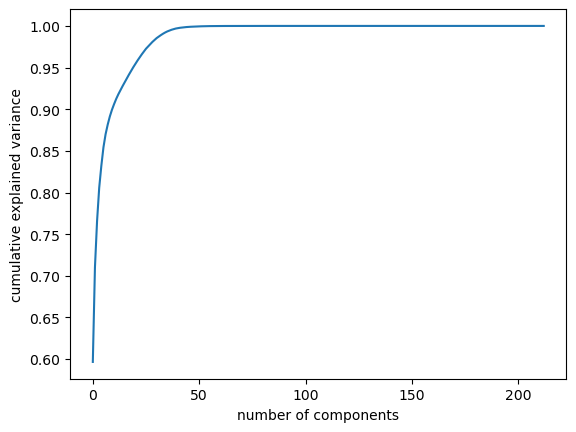

In [14]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [15]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(pca.n_components_)

34


In [16]:
num_components = 40
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

In [17]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df1_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [262]:
most_important_names

['AGE4044_FEM',
 'new_deaths_100_std',
 'NH_MALE',
 'vaccination_rate_1dose',
 'new_cases_100_std',
 'administered_dose1_recip_50_max',
 'AGE8084_FEM',
 'new_cases_1 lag',
 'new_deaths_250_lag',
 'new_deaths_50_std',
 'new_deaths_50_mean',
 'new_deaths_10_std',
 'new_cases_2_lag',
 'new_deaths_2 lag',
 'personal_income',
 'new_cases_3_lag',
 'new_cases_7_lag',
 'new_cases_30_lag',
 'new_cases_350_lag',
 'new_deaths_50_lag',
 'new_cases_50_lag',
 'new_cases_1 lag',
 'AGE85PLUS_FEM',
 'new_cases_150_lag',
 'GDP_current_dollar',
 'GDP_current_dollar',
 'new_deaths_100_mean',
 'new_cases_1 lag',
 'AGE85PLUS_FEM',
 'AGE85PLUS_FEM',
 'new_cases_7_lag',
 'NHNAC_FEMALE',
 'new_cases_10_max',
 'new_deaths_10_mean',
 'new_deaths_250_lag',
 'new_cases_50_std',
 'administered_dose1_recip_10_mean',
 'STATE',
 'new_cases_50_mean',
 'NAC_MALE']

In [263]:
selected_columns = most_important_names + ['PEOPLE_POSITIVE_NEW_CASES_COUNT']
df_subset_multivariate = df1_filtered[selected_columns]
df_subset_multivariate

,AGE4044_FEM,new_deaths_100_std,NH_MALE,vaccination_rate_1dose,new_cases_100_std,administered_dose1_recip_50_max,AGE8084_FEM,new_cases_1 lag,new_deaths_250_lag,new_deaths_50_std,...,NHNAC_FEMALE,new_cases_10_max,new_deaths_10_mean,new_deaths_250_lag,new_cases_50_std,administered_dose1_recip_10_mean,STATE,new_cases_50_mean,NAC_MALE,PEOPLE_POSITIVE_NEW_CASES_COUNT
3320,1251129,15.012032,11875125,0.000000,1902.956031,1763295.0,389043,135.0,30.0,10.085532,...,135473,204.0,2.5,30.0,209.713975,1585251.4,6,191.26,183984,0
3321,1251129,15.125398,11875125,0.000000,1735.226056,1763295.0,389043,0.0,45.0,9.864407,...,135473,204.0,1.9,45.0,206.038716,1409282.6,6,180.92,183984,0
3322,1251129,15.236622,11875125,0.000000,1592.485164,1763295.0,389043,0.0,25.0,9.520783,...,135473,204.0,1.6,25.0,206.208483,1233304.0,6,174.02,183984,0
3323,1251129,15.338191,11875125,0.000000,1570.114754,1763295.0,389043,0.0,32.0,9.214563,...,135473,204.0,1.6,32.0,206.895482,1057243.0,6,168.12,183984,0
3324,1251129,15.448484,11875125,0.000000,1555.706838,1763295.0,389043,0.0,30.0,9.120598,...,135473,204.0,1.4,30.0,206.269651,881105.0,6,160.88,183984,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35685,1008037,88.198520,8911143,0.695652,16807.171257,20890120.0,255266,1110.0,176.0,35.309182,...,29206,6020.0,22.8,176.0,2200.629620,20850498.2,48,3133.64,45352,1243
35686,1008037,88.440059,8911143,0.695893,16492.656648,20897363.0,255266,1243.0,212.0,35.519262,...,29206,6020.0,24.8,212.0,2201.413286,20858851.1,48,3114.44,45352,2556
35687,1008037,88.294811,8911143,0.696238,15709.609007,20907738.0,255266,2556.0,198.0,34.481400,...,29206,6020.0,26.4,198.0,2187.241125,20867608.5,48,3066.12,45352,2513
35688,1008037,88.622383,8911143,0.696478,14981.797022,20914938.0,255266,2513.0,161.0,32.566422,...,29206,3708.0,24.4,161.0,2167.189568,20876521.2,48,3017.70,45352,2715


In [264]:
selected_columns = ['PEOPLE_POSITIVE_NEW_CASES_COUNT']
df_subset_univariate = df1_filtered[selected_columns]
df_subset_univariate


,PEOPLE_POSITIVE_NEW_CASES_COUNT
3320,0
3321,0
3322,0
3323,0
3324,1
...,...
35685,1243
35686,2556
35687,2513
35688,2715


In [265]:
selected_columns = most_important_names + ['PEOPLE_POSITIVE_NEW_CASES_COUNT'] + ['PROVINCE_STATE_NAME']
df_subset_multivariate_1 = df1_filtered[selected_columns]
df_subset_multivariate_1

,AGE4044_FEM,new_deaths_100_std,NH_MALE,vaccination_rate_1dose,new_cases_100_std,administered_dose1_recip_50_max,AGE8084_FEM,new_cases_1 lag,new_deaths_250_lag,new_deaths_50_std,...,new_cases_10_max,new_deaths_10_mean,new_deaths_250_lag,new_cases_50_std,administered_dose1_recip_10_mean,STATE,new_cases_50_mean,NAC_MALE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PROVINCE_STATE_NAME
3320,1251129,15.012032,11875125,0.000000,1902.956031,1763295.0,389043,135.0,30.0,10.085532,...,204.0,2.5,30.0,209.713975,1585251.4,6,191.26,183984,0,California
3321,1251129,15.125398,11875125,0.000000,1735.226056,1763295.0,389043,0.0,45.0,9.864407,...,204.0,1.9,45.0,206.038716,1409282.6,6,180.92,183984,0,California
3322,1251129,15.236622,11875125,0.000000,1592.485164,1763295.0,389043,0.0,25.0,9.520783,...,204.0,1.6,25.0,206.208483,1233304.0,6,174.02,183984,0,California
3323,1251129,15.338191,11875125,0.000000,1570.114754,1763295.0,389043,0.0,32.0,9.214563,...,204.0,1.6,32.0,206.895482,1057243.0,6,168.12,183984,0,California
3324,1251129,15.448484,11875125,0.000000,1555.706838,1763295.0,389043,0.0,30.0,9.120598,...,204.0,1.4,30.0,206.269651,881105.0,6,160.88,183984,1,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35685,1008037,88.198520,8911143,0.695652,16807.171257,20890120.0,255266,1110.0,176.0,35.309182,...,6020.0,22.8,176.0,2200.629620,20850498.2,48,3133.64,45352,1243,Texas
35686,1008037,88.440059,8911143,0.695893,16492.656648,20897363.0,255266,1243.0,212.0,35.519262,...,6020.0,24.8,212.0,2201.413286,20858851.1,48,3114.44,45352,2556,Texas
35687,1008037,88.294811,8911143,0.696238,15709.609007,20907738.0,255266,2556.0,198.0,34.481400,...,6020.0,26.4,198.0,2187.241125,20867608.5,48,3066.12,45352,2513,Texas
35688,1008037,88.622383,8911143,0.696478,14981.797022,20914938.0,255266,2513.0,161.0,32.566422,...,3708.0,24.4,161.0,2167.189568,20876521.2,48,3017.70,45352,2715,Texas


In [266]:
state_dataframes = {}
states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan']

# Iterate through each state in the list
for state in states:
    # Filter data for the current state
    df_subset_state = df_subset_multivariate_1[df_subset_multivariate_1['PROVINCE_STATE_NAME'] == state].copy()
    
    # Store the DataFrame in the dictionary with the state name as the key
    state_dataframes[state] = df_subset_state

In [267]:
sub_CA = state_dataframes['California']
sub_TX = state_dataframes['Texas']
sub_FL = state_dataframes['Florida']
sub_NY = state_dataframes['New York']
sub_PA = state_dataframes['Pennsylvania']
sub_IL = state_dataframes['Illinois']
sub_NC = state_dataframes['North Carolina']
sub_OH = state_dataframes['Ohio']
sub_GA = state_dataframes['Georgia']
sub_MI = state_dataframes['Michigan']

sub_CA = sub_CA.drop(columns=['PROVINCE_STATE_NAME'])
sub_TX = sub_TX.drop(columns=['PROVINCE_STATE_NAME'])
sub_FL = sub_FL.drop(columns=['PROVINCE_STATE_NAME'])
sub_NY = sub_NY.drop(columns=['PROVINCE_STATE_NAME'])
sub_PA = sub_PA.drop(columns=['PROVINCE_STATE_NAME'])
sub_IL = sub_IL.drop(columns=['PROVINCE_STATE_NAME'])
sub_NC = sub_NC.drop(columns=['PROVINCE_STATE_NAME'])
sub_OH = sub_OH.drop(columns=['PROVINCE_STATE_NAME'])
sub_GA = sub_GA.drop(columns=['PROVINCE_STATE_NAME'])
sub_MI = sub_MI.drop(columns=['PROVINCE_STATE_NAME'])

In [268]:
desktop_path = "/Users/asherbank/Desktop/"

# Save each DataFrame as a separate CSV file
sub_CA.to_csv(desktop_path + "sub_CA.csv", index=False)
sub_TX.to_csv(desktop_path + "sub_TX.csv", index=False)
sub_FL.to_csv(desktop_path + "sub_FL.csv", index=False)
sub_NY.to_csv(desktop_path + "sub_NY.csv", index=False)
sub_PA.to_csv(desktop_path + "sub_PA.csv", index=False)
sub_IL.to_csv(desktop_path + "sub_IL.csv", index=False)
sub_NC.to_csv(desktop_path + "sub_NC.csv", index=False)
sub_OH.to_csv(desktop_path + "sub_OH.csv", index=False)
sub_GA.to_csv(desktop_path + "sub_GA.csv", index=False)
sub_MI.to_csv(desktop_path + "sub_MI.csv", index=False)
df_subset_multivariate.to_csv(desktop_path + "df_subset_multivariate.csv", index=False)
df_subset_univariate.to_csv(desktop_path + "df_subset_univariate.csv", index=False)

In [269]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

X = df1_filtered[predictor_columns]
feature_names = X.columns.tolist()

# Z-score the features
scaler = StandardScaler()
X_zscored = scaler.fit_transform(X)

# Define the model
model = LinearRegression()

# Define the number of features to select
num_features_to_select = 50  # Adjust as needed

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)  # Adjust the number of splits as needed

# Initialize RFE
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Fit RFE with cross-validation
X_rfe = rfe.fit_transform(X_zscored, y)

# Get the selected feature indices
selected_feature_indices = np.where(rfe.support_)[0]

# Get the names of the selected features
selected_features = [feature_names[i] for i in selected_feature_indices]

# Print selected features
print("Selected Features:", selected_features)

# Use the selected features for cross-validation
cross_val_scores = cross_val_score(model, X_rfe, y, cv=tscv, scoring='r2')

# Print or use the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", np.mean(cross_val_scores))



Selected Features: ['TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'BA_FEMALE', 'IA_MALE', 'AA_MALE', 'AA_FEMALE', 'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'NAC_MALE', 'NH_FEMALE', 'NHWA_MALE', 'NHWA_FEMALE', 'NHAA_MALE', 'NHTOM_FEMALE', 'NHWAC_FEMALE', 'NHBAC_MALE', 'NHBAC_FEMALE', 'H_MALE', 'HBA_MALE', 'HIA_FEMALE', 'HAA_FEMALE', 'HNA_MALE', 'HWAC_FEMALE', 'HBAC_MALE', 'HBAC_FEMALE', 'HIAC_MALE', 'HNAC_FEMALE', 'AGE04_FEM', 'AGE59_TOT', 'AGE59_MALE', 'AGE1014_TOT', 'AGE1014_FEM', 'AGE2024_FEM', 'AGE2529_FEM', 'AGE3539_MALE', 'AGE3539_FEM', 'AGE4044_TOT', 'AGE4044_FEM', 'AGE4549_TOT', 'AGE4549_FEM', 'AGE5054_TOT', 'AGE5054_FEM', 'AGE6569_TOT', 'AGE7074_TOT', 'AGE7074_MALE', 'AGE85PLUS_TOT', 'AGE85PLUS_FEM']
Cross-Validation Scores: [-7.54832058e+22 -4.04059685e+22 -8.81530442e+21 -1.54226022e+23
 -2.98605148e+23]
Mean CV Score: -1.1550712982817556e+23


In [270]:
num_components_range = range(1, min(X.shape[0], X.shape[1]) + 1)
explained_variances = []

for num_components in num_components_range:
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance for each number of components
plt.plot(num_components_range, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X_zscored = scaler.transform(X)
# The PCA model
num_components = 20
pca = PCA(n_components=num_components) # estimate only 20 PCs
X_new = pca.fit_transform(X_zscored) # project the original data into the PCA space

explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
# Get the loadings of each original feature on each principal component
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=predictor_columns)

# Calculate the absolute loadings and sum across principal components
absolute_loadings_sum = loadings_df.abs().sum(axis=1)

# Sort features based on the sum of absolute loadings
top_features = absolute_loadings_sum.sort_values(ascending=False)

# Display the top features
print(top_features)

new_deaths_250_lag                 2.611161e+00
administered_dose1_recip_10_std    2.528730e+00
new_deaths_50_lag                  2.524825e+00
new_cases_350_lag                  2.425177e+00
new_cases_30_lag                   2.364240e+00
                                       ...     
Bivalent_Booster_18Plus            2.792905e-16
Second_Booster_65Plus              2.315856e-16
Second_Booster_50Plus              2.307182e-16
Bivalent_Booster_5Plus             1.873501e-16
Bivalent_Booster_65Plus            9.020562e-17
Length: 213, dtype: float64


In [ ]:
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that capture 95% of the variance
num_components_99 = np.argmax(cumulative_explained_variance >= 0.99) + 1

# Select the corresponding eigenvectors
selected_eigenvectors_99 = pca.components_[:num_components_99, :]

# Project the original data into the reduced PCA space
X_pca_99 = np.dot(X_zscored, selected_eigenvectors_99.T)

# Print the number of components and the top features for 95% variance
print(f"Number of components to capture 99% of variance: {num_components_99}")
print("Top features based on loadings:")
top_features_99 = loadings_df.abs().sum(axis=1).nlargest(50)
print(top_features_99)

Number of components to capture 99% of variance: 1
Top features based on loadings:
new_deaths_250_lag                  2.611161
administered_dose1_recip_10_std     2.528730
new_deaths_50_lag                   2.524825
new_cases_350_lag                   2.425177
new_cases_30_lag                    2.364240
new_deaths_5_lag                    2.319824
new_deaths_30_lag                   2.256736
new_deaths_100_min                  2.191236
new_deaths_2 lag                    2.168076
new_deaths_7_lag                    2.124383
new_deaths_10_min                   2.118364
new_deaths_50_min                   2.077686
new_cases_10_min                    2.057316
new_deaths_10_std                   2.016241
new_cases_2_lag                     1.988486
new_cases_150_lag                   1.987929
new_deaths_10_max                   1.956515
new_cases_50_lag                    1.837071
Completeness_pct                    1.742498
NHIA_FEMALE                         1.742315
new_deaths_100_ma

In [ ]:
# Find the number of components that capture 95% of the variance
num_components_99 = np.argmax(cumulative_explained_variance >= 0.99) + 1

# Select the corresponding eigenvectors
selected_eigenvectors_99 = eigenvectors[:, :num_components_99]

# Project the original data into the reduced PCA space
X_pca_99 = np.dot(X_zscored, selected_eigenvectors_99)

# Print the number of components and the top features for 95% variance
print(f"Number of components to capture 99% of variance: {num_components_99}")
print("Top features based on loadings:")
top_features_99 = loadings_df.abs().sum(axis=1).nlargest(50)
print(top_features_99)

NameError: name 'eigenvectors' is not defined

In [ ]:
# Set the eigenvalue threshold
eigenvalue_threshold = 1.0

# Find features with significant eigenvalues
significant_feature_indices = np.where(eigenvalues >= eigenvalue_threshold)[0]
significant_features = np.array(predictor_columns)[significant_feature_indices]

# Print the significant features
print("Features with eigenvalues above the threshold:")
print(significant_features)

NameError: name 'eigenvalues' is not defined

In [ ]:
top_100_features = absolute_loadings_sum.nlargest(100)
print(top_100_features)

new_cases_100_min                  2.146998
new_cases_50_min                   2.081475
new_deaths_250_lag                 1.996863
new_deaths_30_lag                  1.978033
new_cases_30_lag                   1.930372
                                     ...   
HBA_FEMALE                         0.822921
HBA_MALE                           0.820232
administered_dose1_recip_50_min    0.804944
Booster_Doses_50Plus               0.802100
HBAC_FEMALE                        0.784381
Length: 100, dtype: float64


Feature Importance from Tree-based Models:

In [ ]:
##from sklearn.ensemble import RandomForestClassifier

# Fit a random forest model
##model = RandomForestClassifier()
##model.fit(X, y)

# Get feature importances
##feature_importances = model.feature_importances_

# Select top features based on importance
##top_features = np.argsort(feature_importances)[::-1][:50]


/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_792/262418797.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


Recursive Feature Elimination (RFE) with TimeSeriesSplit:

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=50)
tscv = TimeSeriesSplit(n_splits=5)  # Adjust the number of splits
X_selected = selector.fit(X, y).transform(X)

Recursive Feature Elimination (RFE):

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Choose an estimator
estimator = LinearRegression()

# Use RFE to select top features
selector = RFE(estimator, n_features_to_select=50)
X_selected = selector.fit_transform(X, y)

Univariate Feature Selection:

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top k features based on ANOVA F-statistic
k_best = SelectKBest(f_classif, k=50)
X_selected = k_best.fit_transform(X, y)

L1 Regularization (LASSO):

In [ ]:
from sklearn.linear_model import LassoCV

# Fit Lasso regression with cross-validated alpha selection
model = LassoCV()
model.fit(X, y)

# Select non-zero coefficient features
top_features = np.where(model.coef_ != 0)[0][:50]

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

In [ ]:
# Z-score normalization
scaler = StandardScaler()
X_zscored = scaler.fit_transform(X)

# Calculate the covariance matrix
covariance_matrix = np.cov(X_zscored, rowvar=False)

# Eigenvalue decomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Choose the number of components
num_components = 50
selected_eigenvectors = eigenvectors[:, :num_components]

# Project the original data into the PCA space
X_pca = np.dot(X_zscored, selected_eigenvectors)

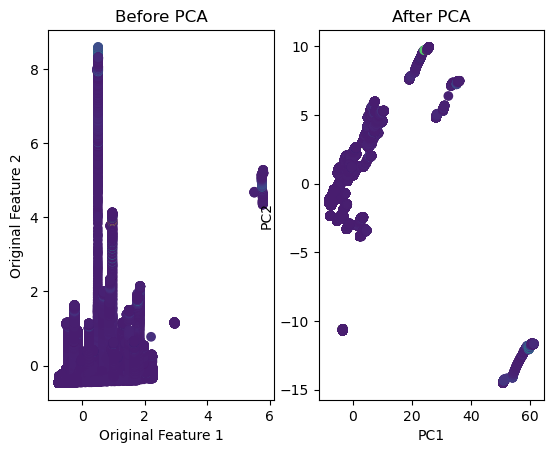

In [ ]:
# Plot the data before and after PCA transformation
fig, axes = plt.subplots(1, 2)
axes[0].scatter(X_zscored[:, 0], X_zscored[:, 1], c=y)
axes[0].set_xlabel('Original Feature 1')
axes[0].set_ylabel('Original Feature 2')
axes[0].set_title('Before PCA')

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')

plt.show()

In [ ]:
# Print the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print(explained_variance_ratio)

[ 7.66179071e-01  8.26665548e-02  6.42056740e-02  3.00009615e-02
  1.52615515e-02  1.15901053e-02  9.00701686e-03  6.25050652e-03
  4.82591776e-03  3.03271178e-03  1.80807406e-03  1.24422742e-03
  7.28679918e-04  6.97620832e-04  5.93590852e-04  4.92037047e-04
  3.01153352e-04  2.85597543e-04  1.91884472e-04  1.19128947e-04
  9.49484912e-05  7.76504014e-05  5.60191572e-05  4.93008234e-05
  3.98397096e-05  3.80667786e-05  3.30313961e-05  3.09469279e-05
  1.84588025e-05  1.65162153e-05  1.10948537e-05  9.05391894e-06
  6.64179954e-06  5.89674185e-06  4.47013889e-06  3.79485444e-06
  3.15360991e-06  2.49711236e-06  2.23954977e-06  2.01024447e-06
  1.78888564e-06  1.52414527e-06  1.30477533e-06  1.13452708e-06
  1.05351871e-06  7.74528590e-07  7.35510874e-07  5.75875337e-07
  4.75656977e-07  4.30604054e-07  3.54412060e-07  3.20472971e-07
  2.93503019e-07  2.68495870e-07  1.97357943e-07  1.57911978e-07
  1.24949868e-07  1.03620740e-07  8.59713339e-08  8.39298911e-08
  6.38520010e-08  5.93318

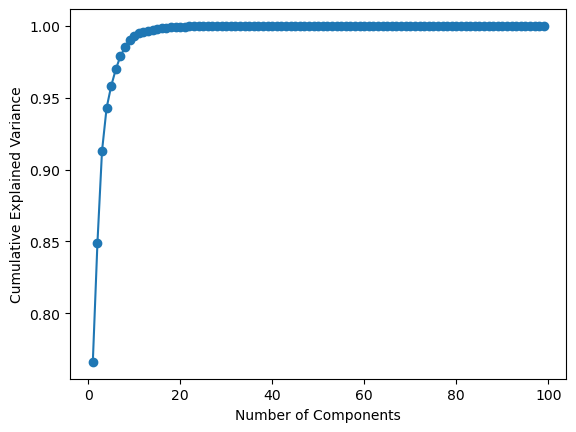

In [ ]:
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components='mle')  # You can also specify the number of components if needed
X_pca = pca.fit_transform(X_standardized)

# Analyze explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Choose the number of components that explain a desired percentage of variance
desired_variance_percentage = 0.95
cumulative_explained_variance = explained_variance_ratio.cumsum()
num_components = (cumulative_explained_variance < desired_variance_percentage).sum() + 1

# Retrain PCA with the chosen number of components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_standardized)

In [ ]:
X_pca

array([[-2.71163004, -1.43604847, -1.74955618, -0.49212083,  0.48103031],
       [-2.71163004, -1.43604847, -1.74955618, -0.49212083,  0.48103031],
       [-2.71163004, -1.43604847, -1.74955618, -0.49212083,  0.48103031],
       ...,
       [-7.99806945,  1.31663896,  0.60843986, -0.40173904, -1.26345897],
       [-7.99801239,  1.31662622,  0.60864471, -0.40173879, -1.26347461],
       [-7.99795775,  1.31661035,  0.60884618, -0.4017381 , -1.26347948]])

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.76617907 0.08266655 0.06420567 0.03000096 0.01526155]


In [ ]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=predictor_columns)
loadings_df

,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,Series_Complete_5Plus,Series_Complete_5to17,Series_Complete_12Plus,...,AGE7579_MALE,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,GDP_current_dollar,personal_income
0,0.016709,0.058186,0.067149,0.058337,0.058434,0.057664,0.056479,0.066637,0.065133,0.056601,...,0.089036,0.089415,0.088799,0.088387,0.089021,0.088536,0.087994,0.088632,0.092172,0.041505
1,-0.085453,-0.017200,-0.013675,-0.017508,-0.018163,-0.036684,-0.020359,-0.018375,0.024651,-0.020751,...,-0.054766,-0.055598,-0.053852,-0.051933,-0.055234,-0.044279,-0.040431,-0.046363,0.004873,-0.126823
2,0.161840,0.239860,0.202378,0.238788,0.238646,0.231441,0.242284,0.205086,0.191093,0.241356,...,-0.009756,-0.010736,-0.014699,-0.014098,-0.015135,-0.017829,-0.015602,-0.019053,0.002184,-0.034463
3,0.040826,0.001326,0.008416,0.001432,0.001024,0.000303,0.001846,0.008351,-0.001796,0.001837,...,-0.006027,-0.009293,-0.010688,-0.007765,-0.012863,-0.020825,-0.016040,-0.023497,-0.008702,0.060177
4,0.067924,0.021651,-0.031849,0.023740,0.025010,0.058518,0.024252,-0.029402,-0.075017,0.026033,...,0.044801,0.040620,0.038874,0.043047,0.035714,0.025636,0.032216,0.021831,-0.057972,-0.043911


In [ ]:
# Calculate the absolute values of loadings
absolute_loadings = np.abs(loadings)

# Create a DataFrame with feature names and their average absolute loadings across all principal components
average_loadings = pd.DataFrame(absolute_loadings.mean(axis=0), index=predictor_columns, columns=['Average Loading'])

# Sort the features by their average absolute loadings in descending order
top_predictors = average_loadings.sort_values(by='Average Loading', ascending=False)

# Display the top predictors
print(top_predictors)

                         Average Loading
NHIA_MALE                       0.141471
NHIA_FEMALE                     0.141341
NHIAC_FEMALE                    0.131800
NHIAC_MALE                      0.131792
NHNAC_MALE                      0.130871
...                                  ...
Second_Booster_65Plus           0.000000
Bivalent_Booster_5Plus          0.000000
Bivalent_Booster_12Plus         0.000000
Bivalent_Booster_18Plus         0.000000
Bivalent_Booster_65Plus         0.000000

[158 rows x 1 columns]


In [ ]:
# Assuming X is your feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# You can choose the number of components or use 'mle' for automatic determination
pca = PCA(n_components='mle')
X_pca = pca.fit_transform(X_scaled)

NameError: name 'X' is not defined